# 02. Example Notebook with Dependencies

This notebook is designed demonstrate a number of goals:

  - The notebook is part of the automated analytical pipeline, as it is run programmatically by the build system, as in the dodo.py file.
  - It is tracked by version control via Git. To avoid large files and the problems associated with non-text files, the notebook is stripped of its output. 
  - In order to avoid re-running the notebook every time it changes (it changes often, even by the act of opening it) and to only rerun it if meaningful changes have been made, the build system only looks for changes in the plaintext version of the notebook. That is, the notebook is converted to a Python script via [nbconvert](https://nbconvert.readthedocs.io/en/latest/), which is often packaged with Jupyter.
  Then, DoIt looks for changes to the Python version. If it detects a difference, then the notebook is re-run. (Note, that you could also convert to a Markdown file with 
  [JupyText](https://github.com/mwouts/jupytext). However, this package is often not packaged with Jupyter.)
  - Since we want to use Jupyter Notebooks for exploratory reports, we want to keep fully-computed versions of the notebook (with the output intact). However, earlier I said that I strip the notebook of its output before committing to version control. Well, to keep the output, every time PyDoit runs the notebook, it outputs an HTML version of the freshly run notebook and saves that HTML report in the `output` directory. That way, you will be able to view the finished report at any time without having to open Jupyter.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from settings import config
from pathlib import Path
OUTPUT_DIR = Path(config("OUTPUT_DIR"))

import pull_fred

In [2]:
df = pull_fred.load_fred()

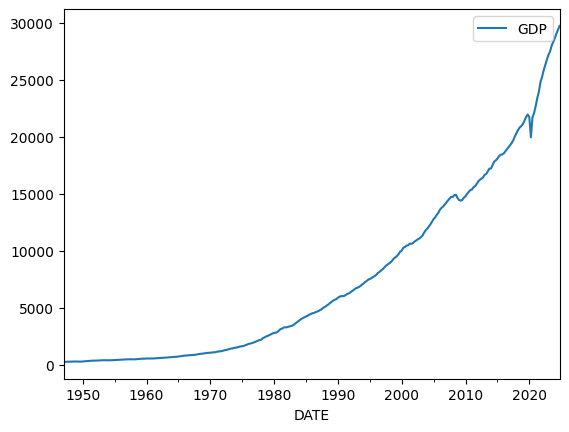

In [3]:
df[["GDP"]].dropna().plot()
filepath = Path(OUTPUT_DIR) / 'GDP_graph.png'
plt.savefig(filepath)